### Import Libraries


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the data

In [2]:
df = pd.read_csv('KNN_Project_Data')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df.shape

(1000, 11)

### Standardize the variables

In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [15]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [16]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(df_feat, df['TARGET CLASS'], test_size=0.3)

## Using KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Predictions and Evaluations

In [23]:
y_pred = knn.predict(x_test)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       152
           1       0.80      0.75      0.77       148

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



In [26]:

pd.crosstab(y_test,y_pred)

col_0,0,1
TARGET CLASS,,
0,124,28
1,37,111


### Choosing a K value

Lets use elbow method to pick a good k value

** Create a for loop that trains values KNN modes with different k values, then keep track of the error_rate for each of these models with a list.

In [27]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

#### Now lets create a plot using the information from the for loop.

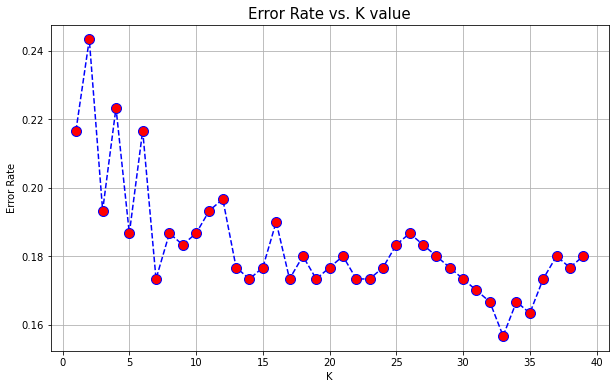

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate,color='blue',linestyle='dashed',
        marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K value', size=15)
plt.xlabel('K', size=10)
plt.ylabel('Error Rate', size=10)
plt.grid()

### Retrain with new K value

Retrain the model with the best K value

In [30]:
# Now with K = 30

knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('With K =30')
print('\n')
print(pd.crosstab(y_test, pred))
print('\n')
print(classification_report(y_test,pred))

With K =30


col_0           0    1
TARGET CLASS          
0             127   25
1              24  124


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       152
           1       0.83      0.84      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

